### Notebook Information

#### In this notebook we are running the LeNet model on CIFAR 100 dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch
import torchvision.transforms as transforms
import torchvision

numEpochs = 10
learningRate = 0.001
numClasses = 100

In [ ]:
if not torch.cuda.is_available():
  device = torch.device('cpu')
else:
  device = torch.device('cuda')

In [ ]:
# Get the training and testing set
trainingset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

testingset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
# Create the dataset loaders
trainloader = torch.utils.data.DataLoader(trainingset, batch_size=128, shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(testingset, batch_size=128, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Create a LeNet Neural network
class LeNet5(nn.Module):
    def __init__(self, numClasses):
        super(LeNet5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, numClasses)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out


In [ ]:
class NeuralNetwork:
  def __init__(self, trainloader, testloader, learning_rate):
    self.model = LeNet5(numClasses).to(device)
    self.cost = nn.CrossEntropyLoss()
    self.optimizer = torch.optim.Adam(self.model.parameters(), lr=learning_rate)
    self.trainloader=trainloader
    self.testloader=testloader
    self.val_losses = []
    self.train_losses = []
    self.val_acc = []
    self.train_acc = []

  def lossplot(self):
    plt.figure(figsize=(10,5))
    plt.title("Training and Validation Loss")
    plt.plot(self.val_losses,label="val")
    plt.plot(self.train_losses,label="train")
    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

  def accplot(self):
    plt.figure(figsize=(10,5))
    plt.title("Training and Validation Accuracy")
    plt.plot(self.val_acc,label="val")
    plt.plot(self.train_acc,label="train")
    plt.xlabel("iterations")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

  def trainCuda(self,epoch):
    correct = 0
    total = 0
    runningLoss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        self.optimizer.zero_grad()
        outputs = self.model(inputs)
        loss = self.cost(outputs, labels)
        loss.backward()
        self.optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        runningLoss += loss.item()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        if (i+1) % 20 == 0: 
            print("Epoch:{}, Iteration:{}, Loss:{:.3f}".format(epoch + 1, i + 1, runningLoss / (i+1)))
    return (runningLoss/len(trainloader), (100*correct / total))

  def testCuda(self):
    correct = 0
    total = 0
    runningLoss = 0.0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = self.model(inputs)
            loss=self.cost(outputs,labels)
            runningLoss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Test Accuracy: %d %%' % (100 * correct / total))
    return (runningLoss/len(testloader), (100*correct / total))

  def fit(self):
    for epoch in range(numEpochs):
      running_loss_train, running_train_acc = self.trainCuda(epoch)
      running_loss_test, running_test_acc = self.testCuda()
      self.train_losses.append(running_loss_train)
      self.val_losses.append(running_loss_test)
      self.train_acc.append(running_train_acc)
      self.val_acc.append(running_test_acc)

In [ ]:
for i, data in enumerate(trainloader, 0):
  if(i>5):
    break
  print(data[1])

tensor([19, 29,  0, 11,  1, 86, 90, 28, 23, 31, 39, 96, 82, 17, 71, 39,  8, 97,
        80, 71, 74, 59, 70, 87, 59, 84, 64, 52, 42, 64,  8, 17, 47, 65, 21, 22,
        81, 11, 24, 84, 78, 45, 49, 97, 56, 76, 11, 90, 89, 78, 73, 14, 87,  9,
        71,  6, 47, 20, 98, 47, 36, 55, 72, 43, 51, 35, 83, 33, 27, 53, 92, 50,
        15, 89, 36, 18, 89, 46, 33, 42, 39, 64, 75, 38, 23, 42, 66, 77, 49, 18,
        46, 15, 35, 69, 95, 83, 75, 99, 73, 93, 55, 39,  4, 97, 61, 93, 51, 69,
        56, 84, 59, 64, 94,  4, 11, 33, 68, 38, 20, 33, 34, 32, 46, 53, 88, 67,
        70, 64])
tensor([53, 64,  8, 96, 87, 30, 20, 30, 66, 19, 76, 87, 52, 62, 35, 63, 40,  4,
        99, 63, 74, 53, 26, 95, 48, 27, 33, 29, 39, 79, 32, 46, 64, 28, 85, 32,
        82, 78, 39, 54, 28, 66, 65, 72, 21, 64, 62, 72,  0, 44,  7, 12, 19, 11,
        31, 61, 79, 45, 81, 79, 98, 43, 46, 67, 80, 68, 74, 48, 81, 94, 86, 69,
        39, 73,  2, 46, 49, 63, 43, 14, 49, 68, 65, 41, 37, 45, 36, 21, 77, 37,
        39,  8,  9, 62,

In [ ]:
neuralNet = NeuralNetwork(trainloader, testloader, learningRate)

In [ ]:
# Fit the LeNet5 Neural Network
neuralNet.fit()

Epoch:1, Iteration:20, Loss:4.589
Epoch:1, Iteration:40, Loss:4.541
Epoch:1, Iteration:60, Loss:4.477
Epoch:1, Iteration:80, Loss:4.415
Epoch:1, Iteration:100, Loss:4.356
Epoch:1, Iteration:120, Loss:4.300
Epoch:1, Iteration:140, Loss:4.245
Epoch:1, Iteration:160, Loss:4.199
Epoch:1, Iteration:180, Loss:4.159
Epoch:1, Iteration:200, Loss:4.126
Epoch:1, Iteration:220, Loss:4.087
Epoch:1, Iteration:240, Loss:4.055
Epoch:1, Iteration:260, Loss:4.024
Epoch:1, Iteration:280, Loss:3.999
Epoch:1, Iteration:300, Loss:3.974
Epoch:1, Iteration:320, Loss:3.953
Epoch:1, Iteration:340, Loss:3.931
Epoch:1, Iteration:360, Loss:3.911
Epoch:1, Iteration:380, Loss:3.892
Test Accuracy: 16 %
Epoch:2, Iteration:20, Loss:3.471
Epoch:2, Iteration:40, Loss:3.488
Epoch:2, Iteration:60, Loss:3.480
Epoch:2, Iteration:80, Loss:3.472
Epoch:2, Iteration:100, Loss:3.464
Epoch:2, Iteration:120, Loss:3.454
Epoch:2, Iteration:140, Loss:3.443
Epoch:2, Iteration:160, Loss:3.437
Epoch:2, Iteration:180, Loss:3.430
Epoch:2,

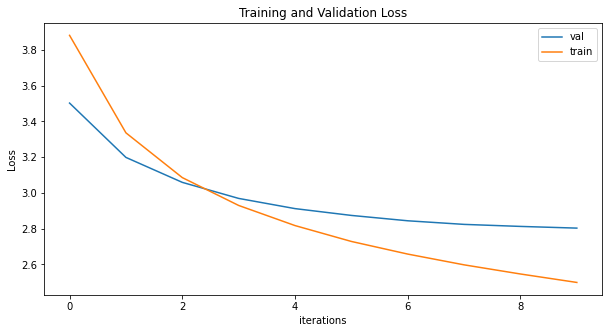

In [ ]:
neuralNet.lossplot()

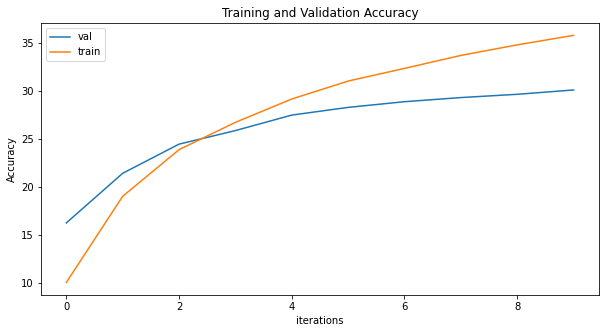

In [ ]:
neuralNet.accplot()